In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

import os
import PIL
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Flatten
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers import Add, Conv2D, Conv2DTranspose, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, UpSampling2D, concatenate,Reshape, Permute
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.models import load_model
from keras.utils import np_utils,  plot_model, to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from keras.callbacks import *

Using TensorFlow backend.


In [ ]:
def unet(input_size=(224,224,1)):
    inputs = Input(input_size, name= 'inputs')
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_0')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_1')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), name= 'L_2')(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_3')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_4')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), name= 'L_5')(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_6')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_7')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), name= 'L_8')(conv3)

    conv4 = Conv2D(224, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_9')(pool3)
    conv4 = Conv2D(224, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_10')(conv4)
    drop4 = Dropout(0.5, name= 'D0')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), name= 'L_11')(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'L_12')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_12')(conv5)
    drop5 = Dropout(0.5, name= 'D1')(conv5)

    up6 = Conv2D(224, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'R_11')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3, name= 'C0')
    #up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', name= 'C0')(conv5), conv4], axis=3, name= 'R_11')
    conv6 = Conv2D(224, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_10')(merge6)
    conv6 = Conv2D(224, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_9')(conv6)

    up7 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'R_8')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3, name= 'C1')
    #up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', name= 'C1')(conv6), conv3], axis=3, name= 'R_8')
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_7')(merge7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_6')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'R_5')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3, name= 'C2')
    #up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', name= 'C2')(conv7), conv2], axis=3, name= 'R_5')
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_4')(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_3')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'R_2')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3, name= 'C3')
    #up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', name= 'C3')(conv8), conv1], axis=3, name= 'R_2')
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_1')(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name= 'R_0')(conv9)

    conv10 = Conv2D(4, (1, 1), activation='softmax', name= 'out')(conv9)

    return Model(inputs=inputs, outputs=conv10)


In [ ]:
model = unet()

In [ ]:
u_net_weights = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/final_unet/lung_final.h5'
model.load_weights(u_net_weights)

In [ ]:
for layer in model.layers:
	layer.trainable = False

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
L_0 (Conv2D)                    (None, 224, 224, 32) 320         inputs[0][0]                     
__________________________________________________________________________________________________
L_1 (Conv2D)                    (None, 224, 224, 32) 9248        L_0[0][0]                        
__________________________________________________________________________________________________
L_2 (MaxPooling2D)              (None, 112, 112, 32) 0           L_1[0][0]                        
____________________________________________________________________________________________

In [ ]:
def skip_classifier(model, left, right, mode, add_con, class_nums):
    layer_1= 'L_'+ str(left)
    layer_2= 'R_'+ str(right)
    #print(layer_1)
    out_1 = model.get_layer(layer_1).output
    out_2 = model.get_layer(layer_2).output

    print(out_1.shape)
    print(out_2.shape)

    trig=0
    higher= out_1.shape[1] 
    if out_1.shape[1] < out_2.shape[1]:
        higher = out_2.shape[1]
        trig=1
    
    #print(higher)
    if out_1.shape[1] != out_2.shape[1]:
      if trig==0:
          while 1:
              out_2= Conv2D(out_2.shape[3], 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(out_2))
              if out_2.shape[1]==higher:  
                break
      else:
          while 1:
              out_1= Conv2D(out_1.shape[3], 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(out_1))
              if out_1.shape[1]==higher:  
                break
    print(out_1.shape)
    print(out_2.shape)
    
    if add_con=='con':
        new_in = concatenate([out_1, out_2], axis=3)

    elif add_con=='add':
        if trig==0:
            out_1 = Conv2D(out_2.shape[3], 2, activation = 'relu', padding = 'same')(out_1)
        else:
            out_2 = Conv2D(out_1.shape[3], 2, activation = 'relu', padding = 'same')(out_2)
        
        new_in = Add()([out_1, out_2])
    print(out_1.shape)
    print(out_2.shape)

    def conv_max(new_in, ker):
        new_in =  Conv2D(new_in.shape[3], (ker, ker), activation='relu', padding='same')(new_in)
        new_in = BatchNormalization()(new_in)
        new_in =  MaxPooling2D(pool_size=(2, 2))(new_in)
        return new_in
    
    def just_conv(new_in, ker):
        new_in =  Conv2D(new_in.shape[3], (ker, ker), activation='relu', padding='same')(new_in)
        new_in = BatchNormalization()(new_in)
        return new_in
    
    def jump_add(new_in, mode= mode):
        if mode==0:
          new_in_1 = conv_max(new_in, 3)
        
        elif mode==1:
          new_in_1 = conv_max(new_in, 3)
          new_in_2 = just_conv(new_in_1, 3)
          new_in_2 = just_conv(new_in_2, 3)
            
          new_in_1 = Add()([new_in_1, new_in_2])

        elif mode==2:
          new_in_1 = conv_max(new_in, 3)
          new_in_2 = just_conv(new_in_1, 3)
          new_in_2 = just_conv(new_in_2, 3)

          new_in_3 = just_conv(new_in_1, 1)
          new_in_3 = just_conv(new_in_3, 1)
          new_in_1 = Add()([new_in_1, new_in_2, new_in_3])

        return new_in_1
    
    while 1:
        new_in = jump_add(new_in)
        if new_in.shape[1]%2: 
            break

    #print(new_in.shape)

    x = Flatten()(new_in)
    #x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(class_nums, activation='sigmoid')(x)
    
    model_classy = Model(inputs = model.input, outputs = x)

    return model_classy


In [ ]:
model_classy= skip_classifier(model,left= 1, right = 1, mode=0, add_con='add', class_nums= 1 )
model_classy.summary()

(None, 224, 224, 32)
(None, 224, 224, 64)
(None, 224, 224, 32)
(None, 224, 224, 64)
(None, 224, 224, 64)
(None, 224, 224, 64)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
L_0 (Conv2D)                    (None, 224, 224, 32) 320         inputs[0][0]                     
__________________________________________________________________________________________________
L_1 (Conv2D)                    (None, 224, 224, 32) 9248        L_0[0][0]                        
__________________________________________________________________________________________________
L_2 (MaxPooling2D)              (None, 112, 112, 32) 0           

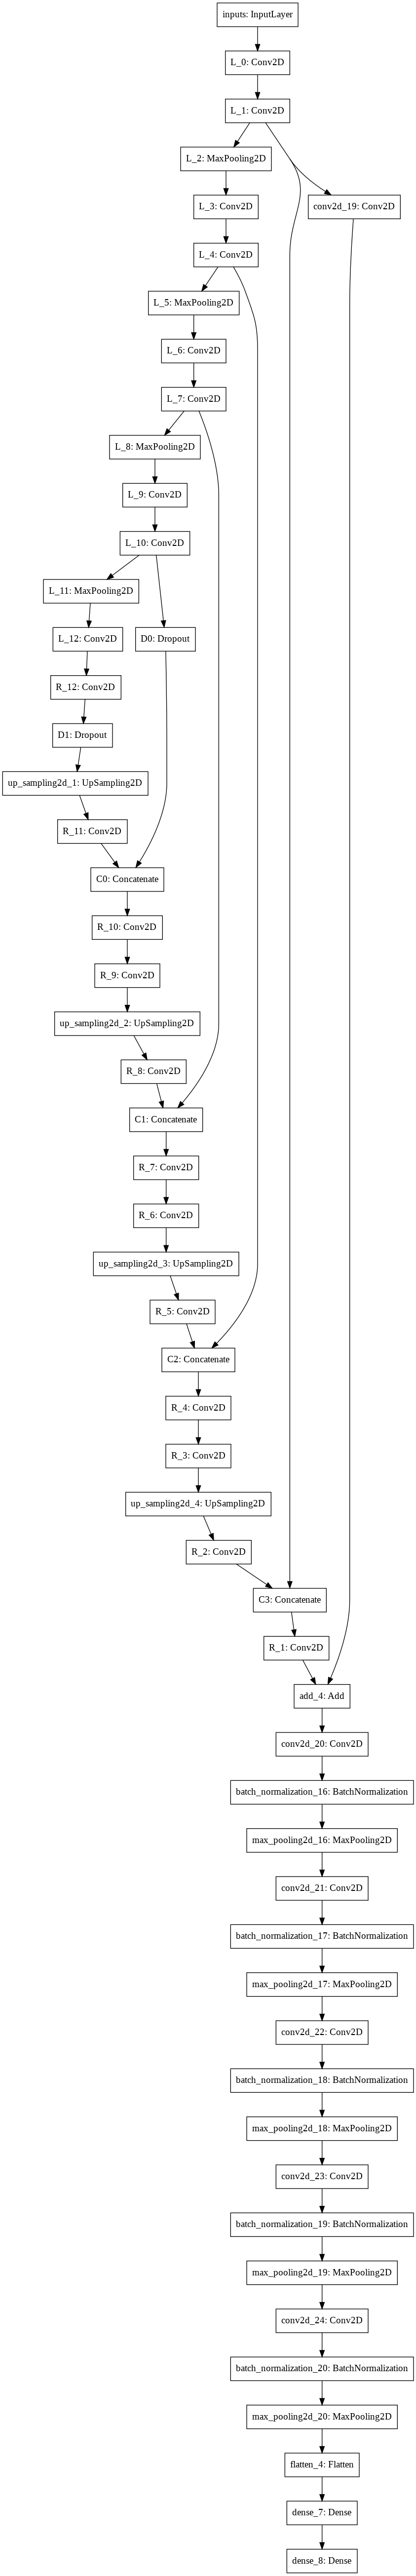

In [ ]:
plot_model(model_classy, to_file='model_classy.png')

In [ ]:
from keras.optimizers import *
from keras.utils import *
model_classy.compile(optimizer=Adam(2e-2), loss= 'binary_crossentropy', metrics = ['accuracy'])

weight_saver = ModelCheckpoint('classifier_sakib_1_1.h5', monitor='loss', 
                                save_best_only=True, save_weights_only=True)
annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001)

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/CLASSIFICATION_MOSMED/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale')

validation_set = validation_datagen.flow_from_directory('/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/CLASSIFICATION_MOSMED/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            color_mode = 'grayscale')

history = model_classy.fit_generator(training_set,
                                     validation_data = validation_set,
                                     steps_per_epoch=50,
                                     epochs= 10,
                                     verbose= 1,
                                     callbacks = [weight_saver, annealer]) 
                         

Found 17913 images belonging to 2 classes.
Found 209 images belonging to 2 classes.
Epoch 1/10
 1/50 [..............................] - ETA: 9:04 - loss: 0.6965 - accuracy: 0.5000